In [232]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"
action_prefix = "wholeale_action.csv"

### Reward analysis

In [69]:
df_reward = pd.read_csv(os.path.join(path+reward_prefix))

In [70]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()

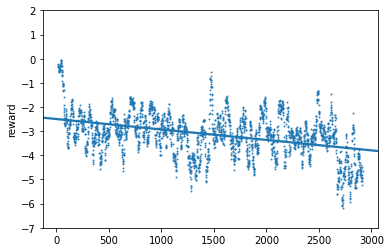

In [71]:
with sns.plotting_context({'lines.markersize': 1.0}):
    graph = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, ci=68, truncate=False)
    graph.set(ylim=(-7, 2))

### Action analysis

In [74]:
df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
#df_reward["observation"] = df_reward["observation"].explode()

In [18]:
df_reward2 = pd.json_normalize(df_reward["observation"])

In [34]:
df_reward

,episode_id,reward,observation,last_action
0,c2b39ec7d48745ee8636f1f26230ae59,0.133775,"{""gameId"": ""is3start9"", ""timeslot"": 474, ""p_gr...",NaN
1,c2b39ec7d48745ee8636f1f26230ae59,0.134695,"{""gameId"": ""is3start9"", ""timeslot"": 475, ""p_gr...",NaN
2,c2b39ec7d48745ee8636f1f26230ae59,0.116321,"{""gameId"": ""is3start9"", ""timeslot"": 476, ""p_gr...",NaN
3,1644da0d659d4a50866f0d31cbad9a94,0.000000,"{""gameId"": ""is3start9"", ""timeslot"": 361, ""p_gr...",;-112.37531304359436;0.0;126.74739360809326;-1...
4,1644da0d659d4a50866f0d31cbad9a94,-0.003616,"{""gameId"": ""is3start9"", ""timeslot"": 362, ""p_gr...",;-102.38832235336304;0.0;136.92913055419922;-5...
...,...,...,...,...
2004,d47a20e49a2b43069fe8603d8d171a4a,0.168577,"{""gameId"": ""is3start9"", ""timeslot"": 912, ""p_gr...",;93.8849687576294;-12.350353598594666;134.0158...
2005,d47a20e49a2b43069fe8603d8d171a4a,-0.021965,"{""gameId"": ""is3start9"", ""timeslot"": 913, ""p_gr...",;-18.81580352783203;0.0;33.18965435028076;-60....
2006,d47a20e49a2b43069fe8603d8d171a4a,-3.216892,"{""gameId"": ""is3start9"", ""timeslot"": 914, ""p_gr...",;143.1516408920288;-55.69064021110535;-44.3778...
2007,d47a20e49a2b43069fe8603d8d171a4a,-1.329682,"{""gameId"": ""is3start9"", ""timeslot"": 915, ""p_gr...",;-121.94693684577942;0.0;24.67585802078247;-17...


In [290]:
test = df_reward["observation"].iloc[df_reward.index>1500]
test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1415 entries, 1501 to 2915
Series name: observation
Non-Null Count  Dtype 
--------------  ----- 
1415 non-null   object
dtypes: object(1)
memory usage: 22.1+ KB


In [267]:
temp = []
for row in test:
    test_row= json.loads(row)
    break

In [300]:
from typing import List

temp_row = []
test_row.get("gameId")
i=0
for row in test:

    test_row=json.loads(row)
    for x in test_row:

        
        temp_row.append(test_row[x])




tempdf = pd.DataFrame(np.array(temp_row).reshape((-1,17)))


    

/tmp/ipykernel_8266/4281771282.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tempdf = pd.DataFrame(np.array(temp_row).reshape((-1,17)))


In [323]:
list_columns = [2,3,4,5,6,7,8,9,10,11,14,15,16]

new_df = pd.DataFrame()

for x in list_columns:

    y = pd.DataFrame(tempdf[x].tolist())



,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1410,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1411,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1412,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1413,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [332]:
lista = [1,2,3,4,5]
tempdf[lista].columns

TypeError: 'list' object is not callable

In [306]:
tempdf.explode(2,)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33960 entries, 0 to 1414
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       33960 non-null  object
 1   1       33960 non-null  object
 2   2       33960 non-null  object
 3   3       33960 non-null  object
 4   4       33960 non-null  object
 5   5       33960 non-null  object
 6   6       33960 non-null  object
 7   7       33960 non-null  object
 8   8       33960 non-null  object
 9   9       33960 non-null  object
 10  10      33960 non-null  object
 11  11      33960 non-null  object
 12  12      33960 non-null  object
 13  13      33960 non-null  object
 14  14      33960 non-null  object
 15  15      33960 non-null  object
 16  16      33960 non-null  object
dtypes: object(17)
memory usage: 4.7+ MB


In [260]:
test.apply(lambda x: print(json.loads(x)).get("gameId"))



{'gameId': 'is3start9', 'timeslot': 409, 'p_grid_imbalance': [7660.84423828125, 8709.3046875, 9365.140625, 5682.03955078125, 8375.763671875, 7914.12646484375, 7127.82568359375, 12623.568359375, 6946.06689453125, 3694.18603515625, -4160.68359375, -7262.79248046875, -8300.638671875, -7092.25927734375, -7596.91943359375, -8654.232421875, -2049.3515625, -2700.288818359375, 2869.50732421875, 1476.70947265625, -10784.3515625, -6654.591796875, -12265.4853515625, -22898.451171875], 'p_customer_prosumption': [-6574.32958984375, -6291.61572265625, -7176.3974609375, -7650.685546875, -8261.05078125, -8525.2412109375, -9228.7978515625, -10037.46484375, -8720.40234375, -7352.24951171875, -5339.23046875, -5502.6845703125, -5204.1630859375, -4444.712890625, -4415.62158203125, -5365.2431640625, -6560.14501953125, -7478.3759765625, -7539.779296875, -7268.462890625, -7093.09765625, -6927.38720703125, -6765.8759765625, -7018.6044921875], 'p_wholesale_price': [38.946944278387136, 36.67337510600319, 37.4914

AttributeError: 'NoneType' object has no attribute 'get'

In [176]:
from numpy import result_type
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")


df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names

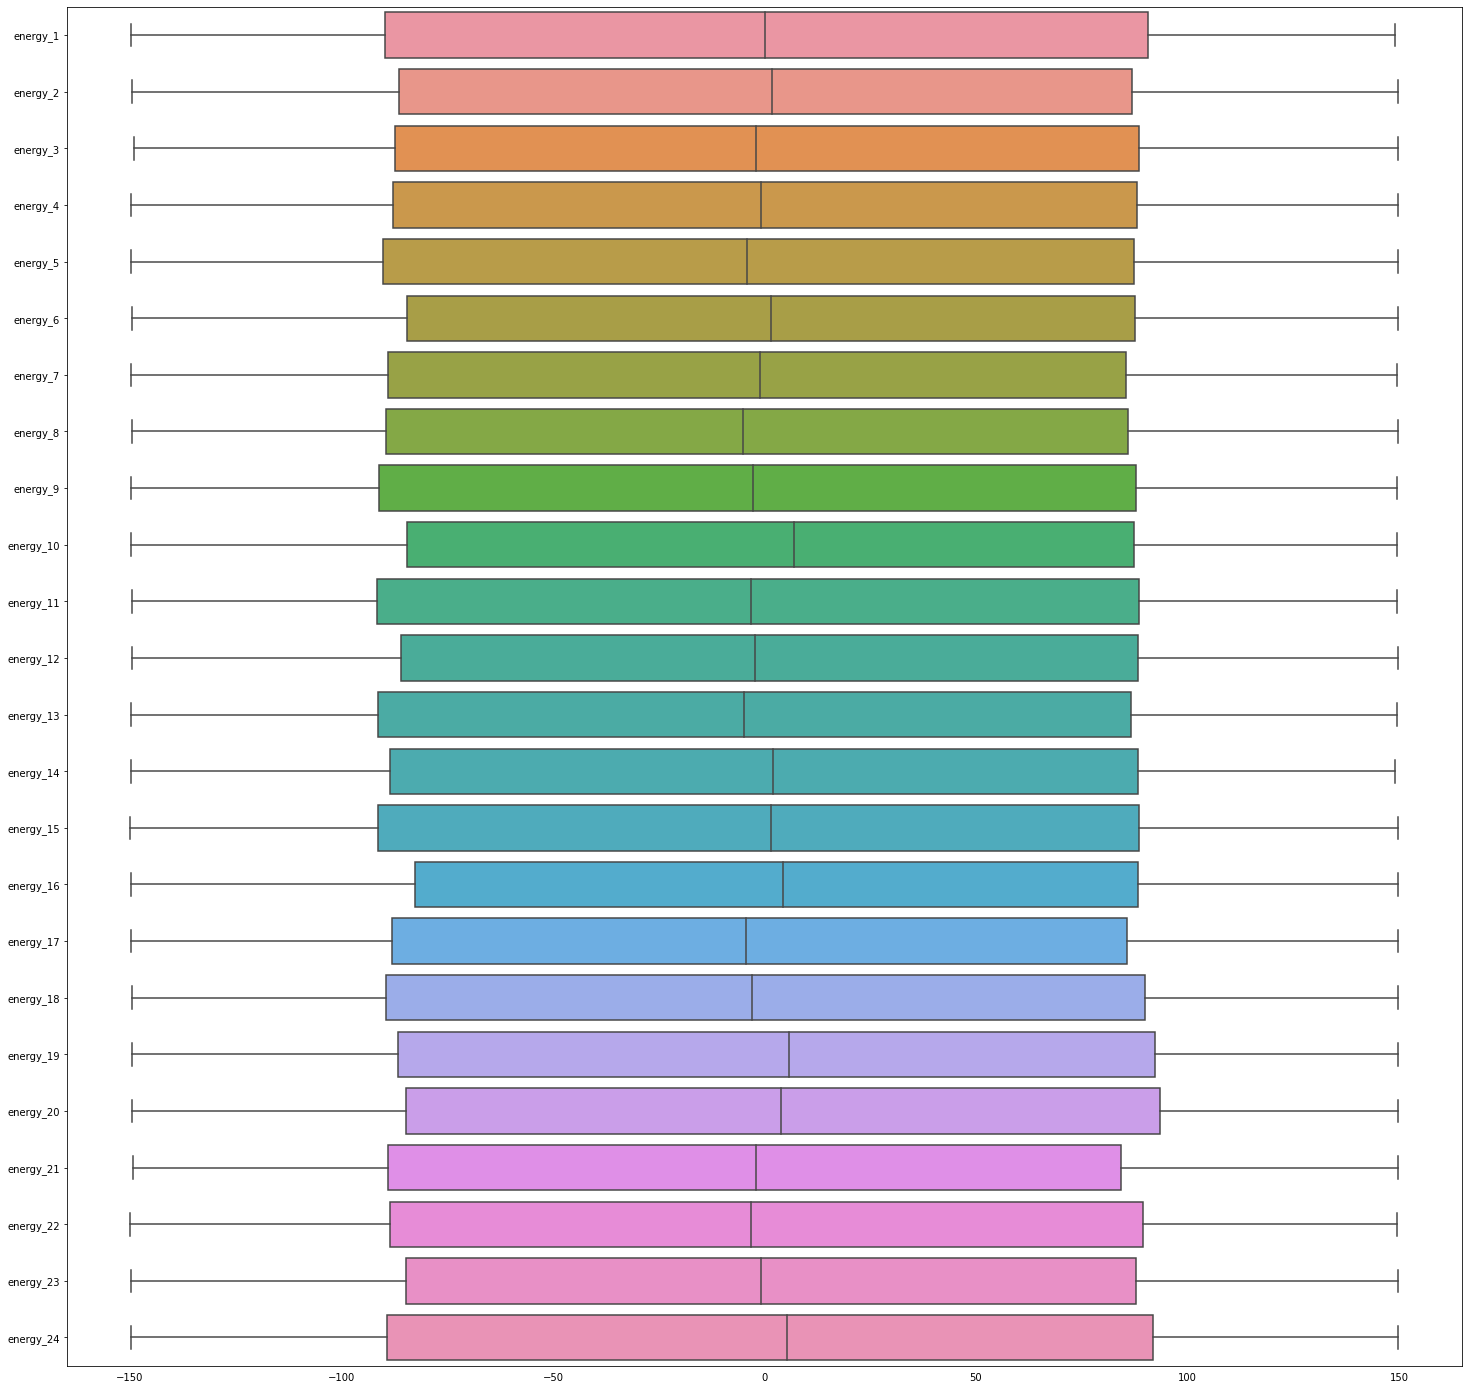

In [226]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[energy], orient="h")

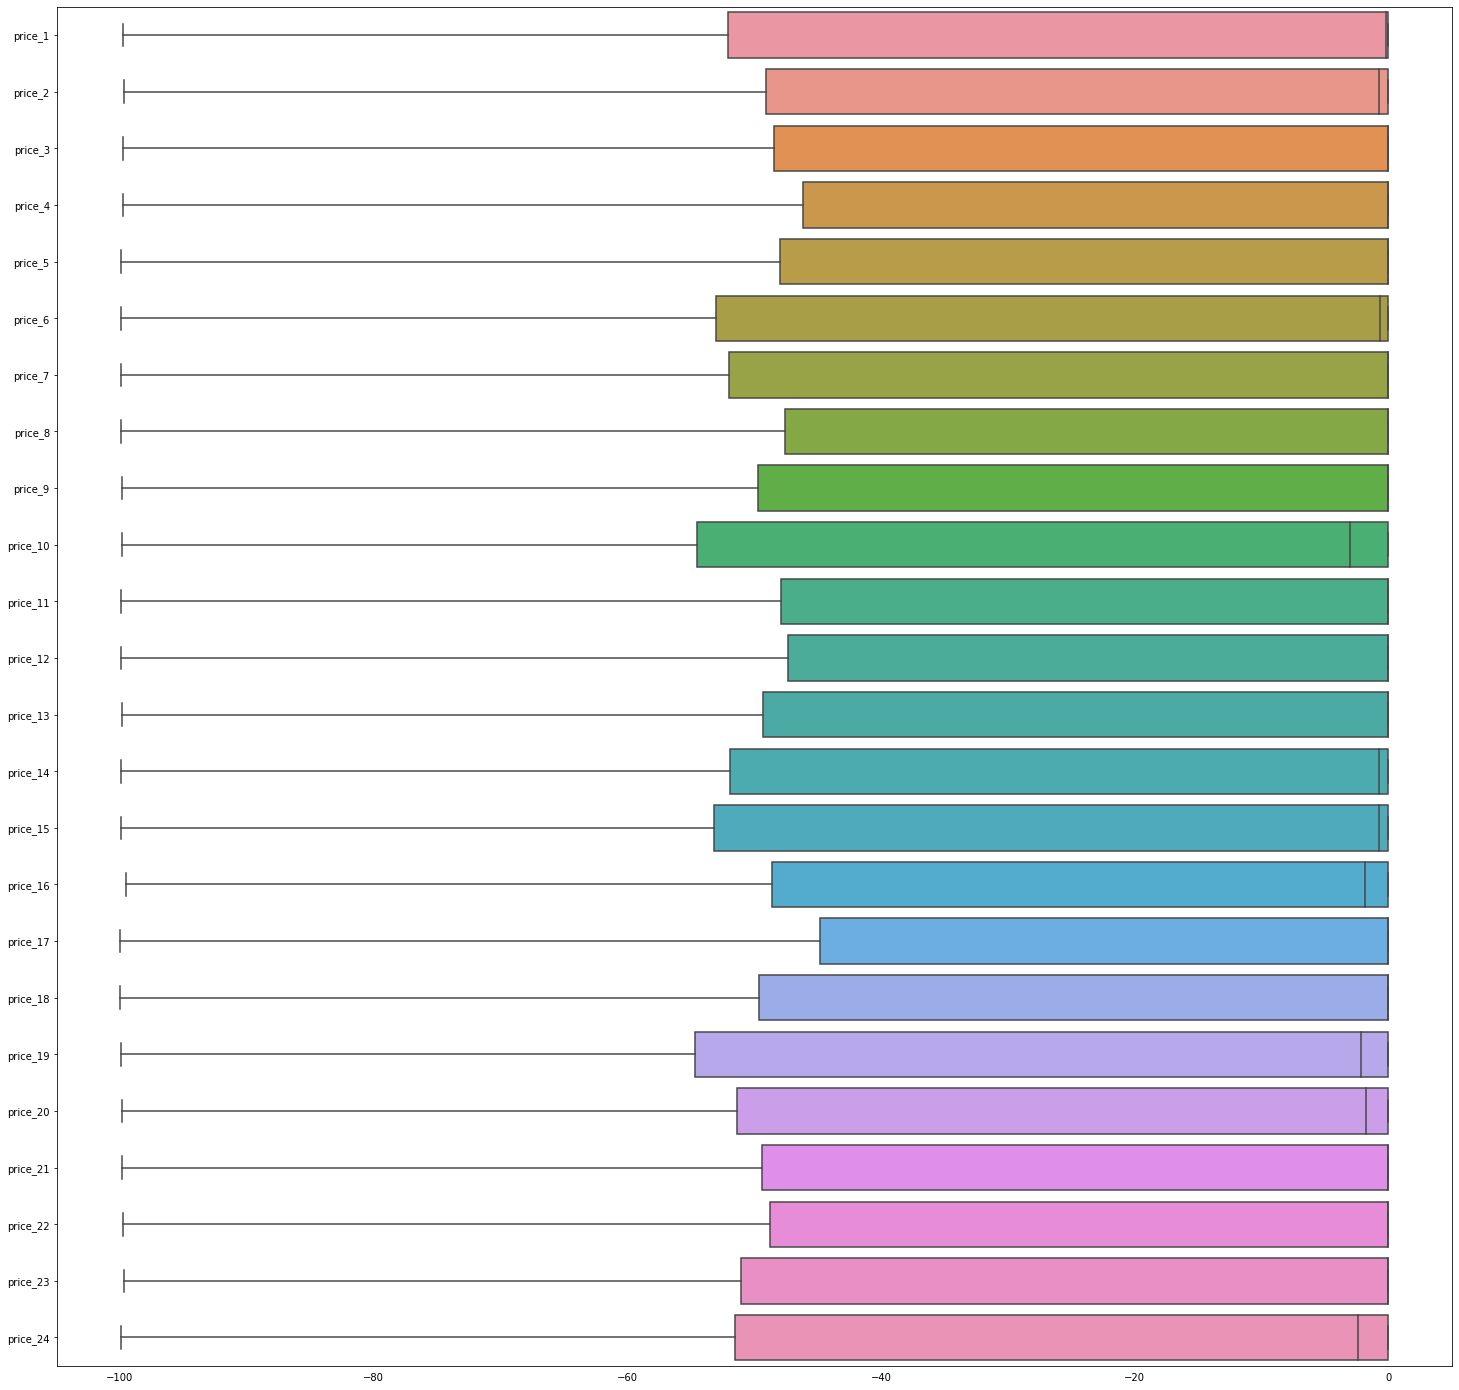

In [224]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df_action[price],  orient="h")